# Installation

In [ ]:
import pandas as pd
#Standard Libs
%matplotlib inline
#<to show the plot in this learning notebook file as well (inline)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Modeling Libs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#Evaluation Libs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# 1. Upload Dataset from Local Drive

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasets-5.csv to datasets-5.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['datasets-5.csv']))
data1 = pd.read_csv(io.BytesIO(uploaded['datasets-5.csv']))


In [ ]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
data.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [ ]:
x = data.drop_duplicates()

In [ ]:
display(x)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


# 2. Data Pre-processing

In [ ]:
data.target.value_counts()

1    629
0    561
Name: target, dtype: int64

<Axes: >

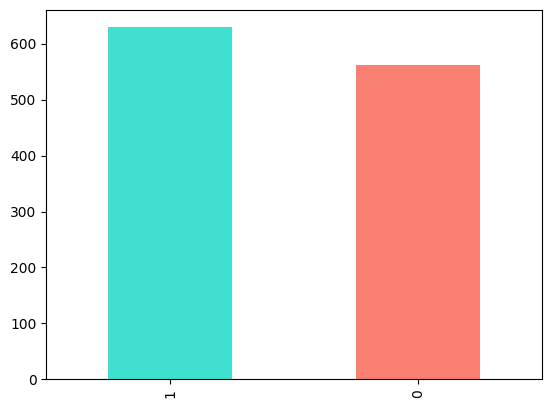

In [ ]:
data.target.value_counts().plot(kind = 'bar', color=['turquoise', 'salmon'])

<Axes: ylabel='target'>

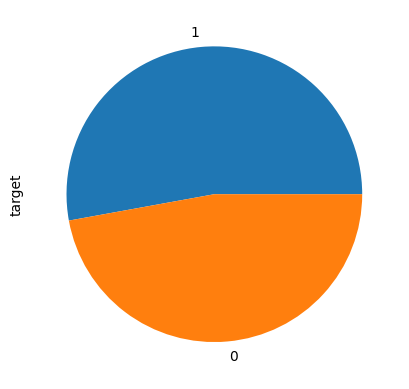

In [ ]:
data.target.value_counts().plot(kind = 'pie')

In [ ]:
# check missing value
data.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [ ]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
data.sex.value_counts()

1    909
0    281
Name: sex, dtype: int64

In [ ]:
pd.crosstab(data.sex, data.target)

target,0,1
sex,,
0,211,70
1,350,559


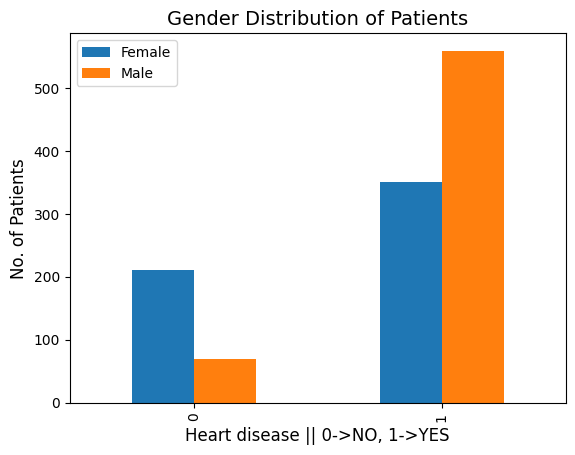

In [ ]:
pd.crosstab(data.sex, data.target).plot(kind='bar')
plt.xlabel('Heart disease || 0->NO, 1->YES',fontsize = 12)
plt.ylabel('No. of Patients', fontsize=12)
plt.title('Gender Distribution of Patients', fontsize=14)
plt.legend(['Female','Male'], fontsize=10)

### Age Distribution

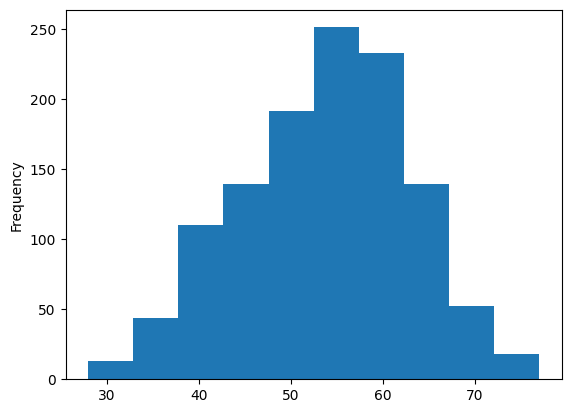

In [ ]:
# Create histogram to see age distribution
data.age.plot.hist();

## Correlation matrix

In [ ]:
data_corr = data.corr()

In [ ]:
data_corr

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


<Axes: >

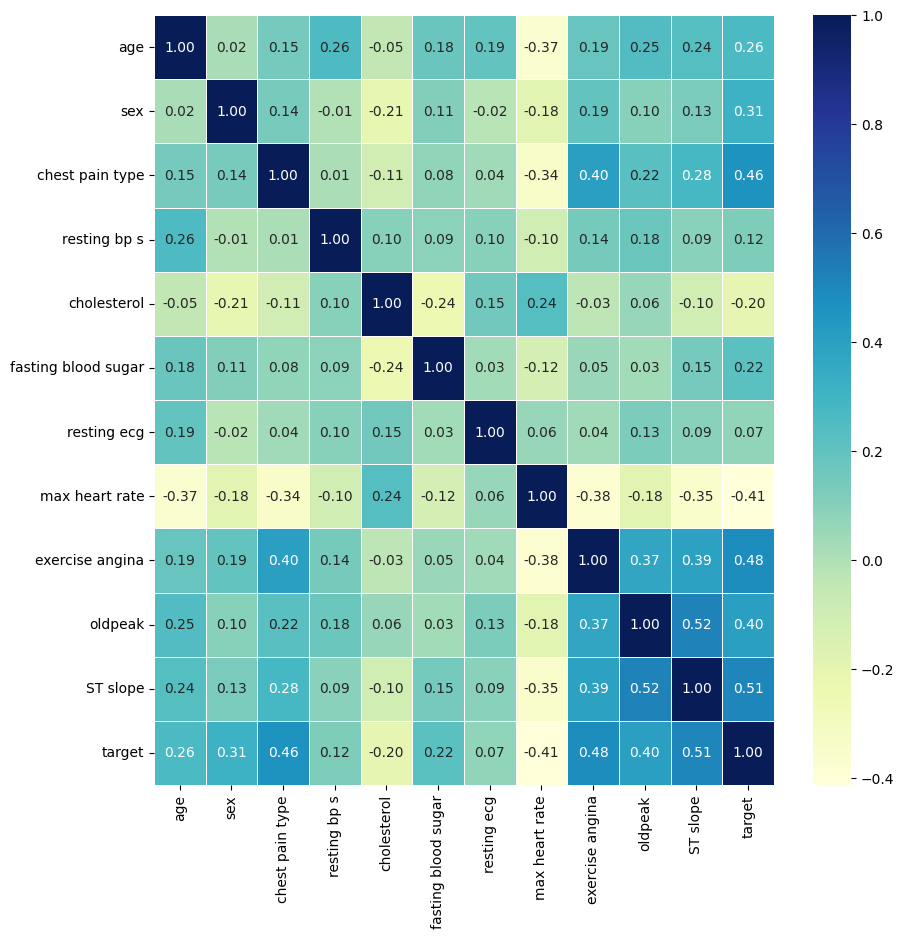

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot= True, linewidth = 0.5, fmt='0.2f', cmap='YlGnBu')

# 3. Data Splitting

In [ ]:
X = data.drop('target', axis =1)
y= data.target

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# 4. Model Choosing and Training

# 4.1 Model Trainig

In [ ]:
models = {'KNN': KNeighborsClassifier(),
          'RFC': RandomForestClassifier(random_state=0),
          'LR' : LogisticRegression(random_state=0),
          'SVM' : svm.SVC(kernel='linear')
}

In [ ]:
def fit_and_score(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [ ]:
model_score = fit_and_score(models, X_train, X_test, y_train , y_test)
model_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.680672268907563,
 'RFC': 0.9369747899159664,
 'LR': 0.8067226890756303,
 'SVM': 0.8025210084033614}

#ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
# ANN architecture
model = Sequential()
model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile and train
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, callbacks=[early_stop])

Epoch 1/100
30/30 [==============================] - 0s 13ms/step - loss: 0.6426 - accuracy: 0.6502 - val_loss: 0.5983 - val_accuracy: 0.7311
Epoch 2/100
30/30 [==============================] - 0s 7ms/step - loss: 0.6323 - accuracy: 0.6450 - val_loss: 0.5984 - val_accuracy: 0.7185
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 0.6240 - accuracy: 0.6376 - val_loss: 0.6032 - val_accuracy: 0.6975
Epoch 4/100
30/30 [==============================] - 0s 10ms/step - loss: 0.6392 - accuracy: 0.6261 - val_loss: 0.6122 - val_accuracy: 0.6807
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.6232 - accuracy: 0.6492 - val_loss: 0.6218 - val_accuracy: 0.6555
Epoch 6/100
30/30 [==============================] - 0s 11ms/step - loss: 0.6280 - accuracy: 0.6355 - val_loss: 0.6089 - val_accuracy: 0.7059
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 0.6239 - accuracy: 0.6397 - val_loss: 0.5969 - val_accuracy: 0.7143
Epoch 8/10

In [ ]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy : {accuracy*100:.2f}%")

8/8 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.7815
Validation Accuracy : 78.15%


<Axes: >

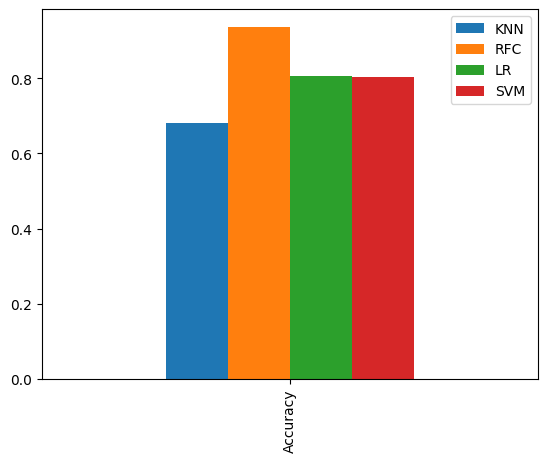

In [ ]:
#Grapically Accuracy
model_comp = pd.DataFrame(model_score, index = ['Accuracy'])
model_comp.plot.bar()

#4.2 Improving Model

### Universal methods used


*   hyperparameters
*   Features improving

### Advance Methods


*   Cross validation
*   confusion matrix






### Hyperparameter Tunning

In [ ]:
KNN = KNeighborsClassifier()
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.1, random_state=0)

In [ ]:
# tuning n_neighbors
train_score = []
test_score = []
# create range for n_neighbors
kn = range(5,30)
#KNN instance through range
for i in kn:
    KNN.set_params(n_neighbors = i)
    # Fit
    KNN.fit(X_train,y_train)
    # update scores lists
    train_score.append(KNN.score(X_train,y_train))
    test_score.append(KNN.score(X_test,y_test))

Max KNN accuracy 72.268908%


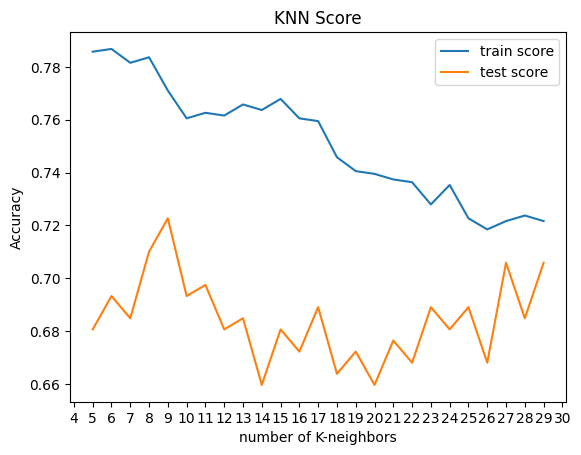

In [ ]:
plt.plot(kn, train_score, label='train score')
plt.plot(kn, test_score, label='test score')
plt.xticks(np.arange(4,31,1))
plt.xlabel('number of K-neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Score')
plt.legend();
print(f'Max KNN accuracy {max(test_score)*100:2f}%')

## Hyperparameter Tunning using GSCV

### LR

In [ ]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
LR_hp = {'C': np.logspace(-4,4,20),
         'solver': ['liblinear', 'lbfgs']}

In [ ]:
# Tuning LR
lr_gs = GridSearchCV(LogisticRegression(random_state=0),
                        param_grid = LR_hp,
                        cv = 5,
                        verbose = True)

In [ ]:
lr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [ ]:
lr_gs.score(X_test,y_test)

0.7983193277310925

In [ ]:
lr_gs.best_params_

{'C': 78.47599703514607, 'solver': 'liblinear'}

### RF

In [ ]:
# Tuning RFC
RFC_hp2 = { 'n_estimators': [510,610],
            'max_depth': [None,10],
            'min_samples_split': [10,12],
            'min_samples_leaf': [1,2]}

rfc_gs = GridSearchCV(RandomForestClassifier(random_state=0),
                        param_grid = RFC_hp2,
                        cv = 5,
                        verbose = True)

In [ ]:
# Fit
rfc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [10, 12],
                         'n_estimators': [510, 610]},
             verbose=True)

In [ ]:
rfc_gs.score(X_test,y_test)

0.9159663865546218

In [ ]:
rfc_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 610}

### SVM

In [ ]:
SVM_hp = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [ ]:
svm_gs = GridSearchCV(svm.SVC(),
                      param_grid = SVM_hp,
                      cv=5,
                      verbose = 3)

In [ ]:
svm_gs.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.524 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.524 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.524 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svm_gs.score(X_test,y_test)

0.8319327731092437

# 5. Performance Analysis

### LR

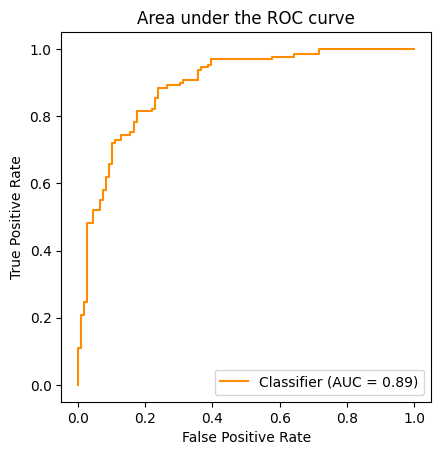

In [ ]:
# Plot Area under the curve for Logistic Modek
lrgs_predict = lr_gs.predict(X_test)
lrgs_predict_proba = lr_gs.predict_proba(X_test)
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_test,
    lrgs_predict_proba[:, 1],
    color="darkorange")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area under the ROC curve")
plt.legend()
plt.show()

In [ ]:
# confusion matrix
print(confusion_matrix(y_test,lrgs_predict))

[[ 85  24]
 [ 24 105]]


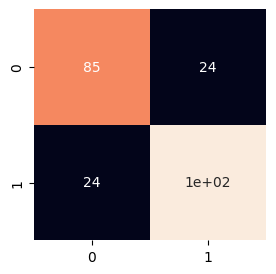

In [ ]:
def plot_confusion(y_test,lrgs_predict):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,lrgs_predict),
                     annot =True,
                     cbar = False
                    )

plot_confusion(y_test,lrgs_predict)

In [ ]:
# Classifican report
print(classification_report(y_test,lrgs_predict))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       109
           1       0.81      0.81      0.81       129

    accuracy                           0.80       238
   macro avg       0.80      0.80      0.80       238
weighted avg       0.80      0.80      0.80       238



In [ ]:
# cross validation accuracy
lr_new = LogisticRegression(solver= 'lbfgs', C= 3792.690190732246, random_state=0)

cv_accuracy = cross_val_score(lr_new, X, y, cv=7, scoring = 'accuracy')
cv_accuracy = cv_accuracy.mean()
cv_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8058823529411765

### RF

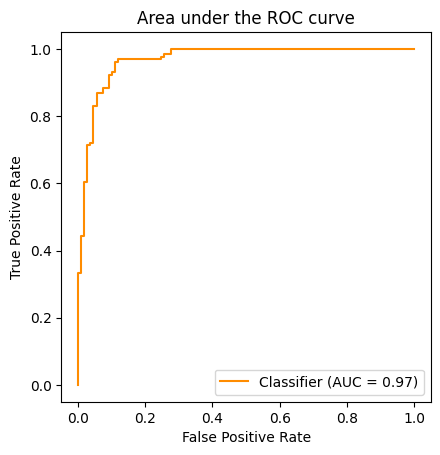

In [ ]:
# Plot Area under the curve for Logistic Modek
rfcgs_predict = rfc_gs.predict(X_test)
rfcgs_predict_proba = rfc_gs.predict_proba(X_test)
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_test,
    rfcgs_predict_proba[:, 1],
    color="darkorange")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area under the ROC curve")
plt.legend()
plt.show()

In [ ]:
# confusion matrix
print(confusion_matrix(y_test,rfcgs_predict))

[[ 99  10]
 [ 10 119]]


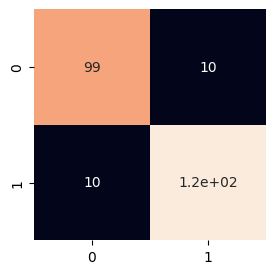

In [ ]:
def plot_confusion(y_test,lrgs_predict):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,rfcgs_predict),
                     annot =True,
                     cbar = False
                    )

plot_confusion(y_test,rfcgs_predict)

In [ ]:
# Classifican report
print(classification_report(y_test,rfcgs_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       109
           1       0.92      0.92      0.92       129

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



In [ ]:
# cross validation accuracy
rfc_new = RandomForestClassifier(max_depth = None,
  min_samples_leaf =1,
  min_samples_split=10,
  n_estimators=610,
  random_state = 0)

cv_accuracy = cross_val_score(rfc_new, X, y, cv=7, scoring = 'accuracy')
cv_accuracy = cv_accuracy.mean()
cv_accuracy

0.8949579831932775

### SVM

# 6. Feature Selection using Data Correlation

In [ ]:
#X1_train , X1_test , y_train , y_test = train_test_split(X1,y, test_size=0.2, random_state=0)

In [ ]:
# Total features -> age,	sex,	chest pain type,	resting bp s,	cholesterol,	fasting blood sugar,	resting ecg,	max heart rate,	exercise angina,	oldpeak,	ST slope
#X1 = data2.drop(columns=['sex','resting bp s','fasting blood sugar','resting ecg','target'], inplace=True)

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving datasets-5-1.csv to datasets-5-1.csv


In [ ]:
data2 = pd.read_csv(io.BytesIO(uploaded1['datasets-5-1.csv']))

In [ ]:
data2.head()

,age,chest pain type,cholesterol,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,2,289,172,0,0.0,1,0
1,49,3,180,156,0,1.0,2,1
2,37,2,283,98,0,0.0,1,0
3,48,4,214,108,1,1.5,2,1
4,54,3,195,122,0,0.0,1,0


In [ ]:
data2.tail()

,age,chest pain type,cholesterol,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,264,132,0,1.2,2,1
1186,68,4,193,141,0,3.4,2,1
1187,57,4,131,115,1,1.2,2,1
1188,57,2,236,174,0,0.0,2,1
1189,38,3,175,173,0,0.0,1,0


In [ ]:
X1 = data2.drop('target', axis =1)
y1= data2.target

In [ ]:
X1_train , X1_test , y1_train , y1_test = train_test_split(X1,y1, test_size=0.2, random_state=0)

# 6.1 Model Choosing and Training

In [ ]:
models = {'KNN': KNeighborsClassifier(),
          'RFC': RandomForestClassifier(random_state=0),
          'LR' : LogisticRegression(random_state=0),
          'SVM' : svm.SVC(kernel='linear')
}

In [ ]:
def fit_and_score(models, X1_train, X1_test, y1_train , y1_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X1_train,y1_train)
        model_score[name] = model.score(X1_test,y1_test)
    return model_score

In [ ]:
model_score = fit_and_score(models, X1_train, X1_test, y1_train , y1_test)
model_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6764705882352942,
 'RFC': 0.9243697478991597,
 'LR': 0.8109243697478992,
 'SVM': 0.8025210084033614}

<Axes: >

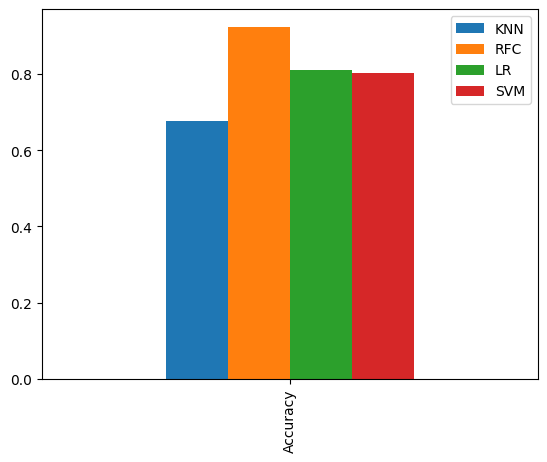

In [ ]:
#Grapically Accuracy
model_comp = pd.DataFrame(model_score, index = ['Accuracy'])
model_comp.plot.bar()

# 6.2  Improving Model

In [ ]:
KNN = KNeighborsClassifier()
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# tuning n_neighbors
train_score = []
test_score = []
# create range for n_neighbors
kn = range(5,30)
#KNN instance through range
for i in kn:
    KNN.set_params(n_neighbors = i)
    # Fit
    KNN.fit(X1_train,y1_train)
    # update scores lists
    train_score.append(KNN.score(X1_train,y1_train))
    test_score.append(KNN.score(X1_test,y1_test))

Max KNN accuracy 72.268908%


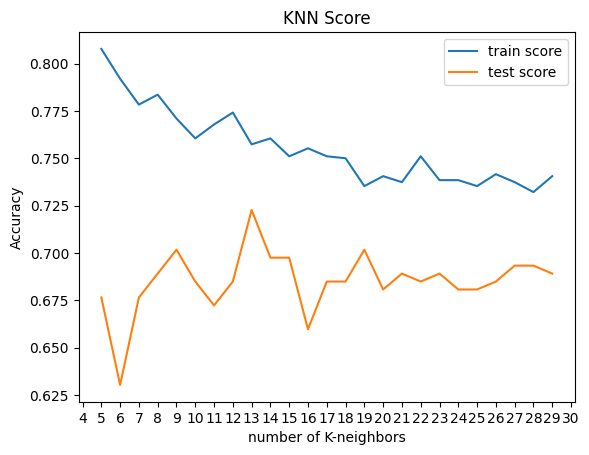

In [ ]:
plt.plot(kn, train_score, label='train score')
plt.plot(kn, test_score, label='test score')
plt.xticks(np.arange(4,31,1))
plt.xlabel('number of K-neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Score')
plt.legend();
print(f'Max KNN accuracy {max(test_score)*100:2f}%')

## Hyperparameter Tunning using GSCV

In [ ]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
LR_hp = {'C': np.logspace(-4,4,20),
         'solver': ['liblinear', 'lbfgs']}

In [ ]:
# Tuning LR
lr_gs = GridSearchCV(LogisticRegression(random_state=0),
                        param_grid = LR_hp,
                        cv = 5,
                        verbose = True)

In [ ]:
lr_gs.fit(X1_train, y1_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [ ]:
lr_gs.score(X1_test,y1_test)

0.7899159663865546

In [ ]:
lr_gs.best_params_

{'C': 1438.44988828766, 'solver': 'lbfgs'}

## RF

In [ ]:
# Tuning RFC
RFC_hp2 = { 'n_estimators': [510,610],
            'max_depth': [None,10],
            'min_samples_split': [10,12],
            'min_samples_leaf': [1,2]}

rfc_gs = GridSearchCV(RandomForestClassifier(random_state=0),
                        param_grid = RFC_hp2,
                        cv = 5,
                        verbose = True)
# Fit
rfc_gs.fit(X1_train,y1_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [10, 12],
                         'n_estimators': [510, 610]},
             verbose=True)

In [ ]:
rfc_gs.score(X1_test,y1_test)

0.9033613445378151

In [ ]:
rfc_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 610}

## SVM

In [ ]:
SVM_hp = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

svm_gs = GridSearchCV(svm.SVC(),
                      param_grid = SVM_hp,
                      cv=5,
                      verbose = 3)

In [ ]:
svm_gs.fit(X1_train,y1_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.791 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.838 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.826 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.795 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.837 total time=   0.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.524 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:
svm_gs.score(X1_test,y1_test)

0.7773109243697479

In [ ]:
svm_gs.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

# 6.3 Performance Analysis

## LR

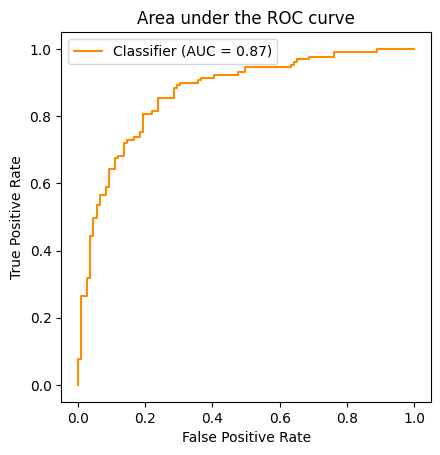

In [ ]:
# Plot Area under the curve for Logistic Modek
lrgs_predict = lr_gs.predict(X1_test)
lrgs_predict_proba = lr_gs.predict_proba(X1_test)
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y1_test,
    lrgs_predict_proba[:, 1],
    color="darkorange")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area under the ROC curve")
plt.legend()
plt.show()

In [ ]:
# confusion matrix
print(confusion_matrix(y1_test,lrgs_predict))

[[ 83  26]
 [ 24 105]]


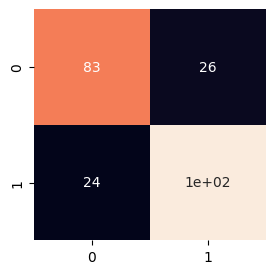

In [ ]:
def plot_confusion(y1_test,lrgs_predict):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y1_test,lrgs_predict),
                     annot =True,
                     cbar = False
                    )

plot_confusion(y_test,lrgs_predict)

In [ ]:
# Classifican report
print(classification_report(y_test,lrgs_predict))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       109
           1       0.80      0.81      0.81       129

    accuracy                           0.79       238
   macro avg       0.79      0.79      0.79       238
weighted avg       0.79      0.79      0.79       238



In [ ]:
# cross validation accuracy
lr_new = LogisticRegression(solver= 'lbfgs', C= 3792.690190732246, random_state=0)

cv_accuracy = cross_val_score(lr_new, X1, y1, cv=7, scoring = 'accuracy')
cv_accuracy = cv_accuracy.mean()
cv_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7991596638655462

## RF

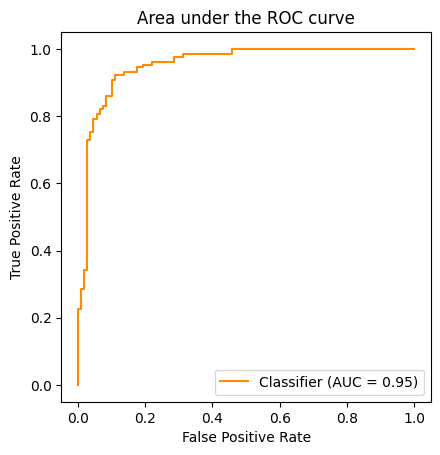

In [ ]:
# Plot Area under the curve for Logistic Modek
rfcgs_predict = rfc_gs.predict(X1_test)
rfcgs_predict_proba = rfc_gs.predict_proba(X1_test)
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y1_test,
    rfcgs_predict_proba[:, 1],
    color="darkorange")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area under the ROC curve")
plt.legend()
plt.show()

In [ ]:
# confusion matrix
print(confusion_matrix(y1_test,rfcgs_predict))

[[ 96  13]
 [ 10 119]]


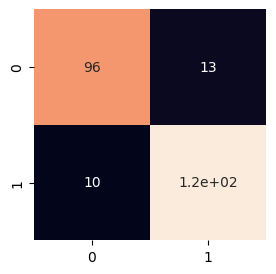

In [ ]:
def plot_confusion(y1_test,lrgs_predict):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y1_test,rfcgs_predict),
                     annot =True,
                     cbar = False
                    )

plot_confusion(y1_test,rfcgs_predict)

In [ ]:
# Classifican report
print(classification_report(y1_test,rfcgs_predict))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       109
           1       0.90      0.92      0.91       129

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238



In [ ]:
# cross validation accuracy
rfc_new = RandomForestClassifier(max_depth = None,
  min_samples_leaf =1,
  min_samples_split=10,
  n_estimators=610,
  random_state = 0)

cv_accuracy = cross_val_score(rfc_new, X1, y1, cv=7, scoring = 'accuracy')
cv_accuracy = cv_accuracy.mean()
cv_accuracy

0.8781512605042018

#7 Feature Selection Using Lasso and Others

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold


## 7.1 Univariate Feature Selection

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasets-5.csv to datasets-5 (2).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['datasets-5 (2).csv']))

In [ ]:
X = data.drop('target', axis =1)
y= data.target

### SVM

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# Feature Selection

sc = MinMaxScaler()
X_sc = sc.fit_transform(X_train)

selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = selector.fit_transform(X_sc, y_train)
X_test_selected = selector.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


In [ ]:
# Classifier
clf = svm.SVC(kernel='rbf', C= 1000, gamma = 0.0001)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)


In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [ ]:
print("SVM with Univariate Feature Selection:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

SVM with Univariate Feature Selection:
Accuracy: 0.5420, Precision: 0.5420, Recall: 1.0000, F1 Score: 0.7030


## Artificial Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Univariate Feature Selection

sc = MinMaxScaler()
X_sc = sc.fit_transform(X_train)

selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = selector.fit_transform(X_sc, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


In [ ]:
# Standardizing the dataset for neural network
scaler = StandardScaler().fit(X_train_selected)
X_train_selected = scaler.transform(X_train_selected)
X_val_selected = scaler.transform(X_val_selected)
X_test_selected = scaler.transform(X_test_selected)


In [ ]:
# ANN architecture
model = Sequential()
model.add(Dense(11, input_dim=X_train_selected.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile and train
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
#early_stop = EarlyStopping(monitor='val_loss', patience=30)


In [ ]:
history = model.fit(X_train_selected, y_train,
                    validation_data=(X_val_selected, y_val),
                    epochs=100, batch_size=32)

Epoch 1/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4595 - accuracy: 0.7955 - val_loss: 2.9702 - val_accuracy: 0.5462
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4823 - accuracy: 0.7829 - val_loss: 2.9712 - val_accuracy: 0.5462
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4558 - accuracy: 0.8067 - val_loss: 3.0452 - val_accuracy: 0.5462
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4874 - accuracy: 0.7857 - val_loss: 3.0759 - val_accuracy: 0.5462
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4481 - accuracy: 0.7857 - val_loss: 2.9739 - val_accuracy: 0.5462
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4810 - accuracy: 0.7927 - val_loss: 3.0312 - val_accuracy: 0.5462
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4640 - accuracy: 0.8067 - val_loss: 3.0833 - val_accuracy: 0.5462
Epoch 8/100
2

In [ ]:
# Evaluate
loss, accuracy = model.evaluate(X_val_selected, y_val)
print(f"Validation Accuracy with Univariate Feature Selection: {accuracy*100:.2f}%")

8/8 [==============================] - 0s 4ms/step - loss: 6.2024 - accuracy: 0.5462
Validation Accuracy with Univariate Feature Selection: 54.62%


## 7.2 Recursive Feature Elimination (RFE) with SVM

In [ ]:
# Feature Selection
selector = RFE(estimator=svm.SVC(kernel="rbf"), n_features_to_select=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

ValueError: ignored

## 7.3 Feature Selection using SelectFromModel

### SVM

In [ ]:
selector = SelectFromModel(estimator=svm.SVC(kernel="linear", probability=True))
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [ ]:
# Classifier
clf = svm.SVC()
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)


In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [ ]:
print("SVM with SelectFromModel:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

SVM with SelectFromModel:
Accuracy: 0.8277, Precision: 0.8056, Recall: 0.8992, F1 Score: 0.8498


## Artificial Neural Network

### Model-based Feature Importance using RandomForest with ANN:

In [ ]:
# Feature selection using RandomForest
forest = RandomForestClassifier(n_estimators=100)
selector = SelectFromModel(forest)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)



In [ ]:
# Standardizing
scaler = StandardScaler().fit(X_train_selected)
X_train_selected = scaler.transform(X_train_selected)
X_val_selected = scaler.transform(X_val_selected)
X_test_selected = scaler.transform(X_test_selected)


In [ ]:
# ANN architecture
model = Sequential()
model.add(Dense(11, input_dim=X_train_selected.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile and train
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_selected, y_train,
                    validation_data=(X_val_selected, y_val),
                    epochs=100, batch_size=32, callbacks=[early_stop])


Epoch 1/100
23/23 [==============================] - 3s 13ms/step - loss: 0.7572 - accuracy: 0.4748 - val_loss: 0.6661 - val_accuracy: 0.5546
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7139 - accuracy: 0.5238 - val_loss: 0.6560 - val_accuracy: 0.6261
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7034 - accuracy: 0.5532 - val_loss: 0.6482 - val_accuracy: 0.6387
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.5630 - val_loss: 0.6402 - val_accuracy: 0.6807
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6605 - accuracy: 0.6008 - val_loss: 0.6315 - val_accuracy: 0.6933
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6398 - accuracy: 0.6190 - val_loss: 0.6208 - val_accuracy: 0.7311
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6374 - accuracy: 0.6176 - val_loss: 0.6090 - val_accuracy: 0.7689
Epoch 8/100


In [ ]:
# Evaluate
loss, accuracy = model.evaluate(X_val_selected, y_val)
print(f"Validation Accuracy with RandomForest-based Feature Selection: {accuracy*100:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8403
Validation Accuracy with RandomForest-based Feature Selection: 84.03%


### 7.4 Lasso

##### Using GridSearchCV to find the best hyperparameter.

In [ ]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


In [ ]:
names= X.columns
print("Column Names: {}".format(names.values))

Column Names: ['age' 'sex' 'chest pain type' 'resting bp s' 'cholesterol'
 'fasting blood sugar' 'resting ecg' 'max heart rate' 'exercise angina'
 'oldpeak' 'ST slope']


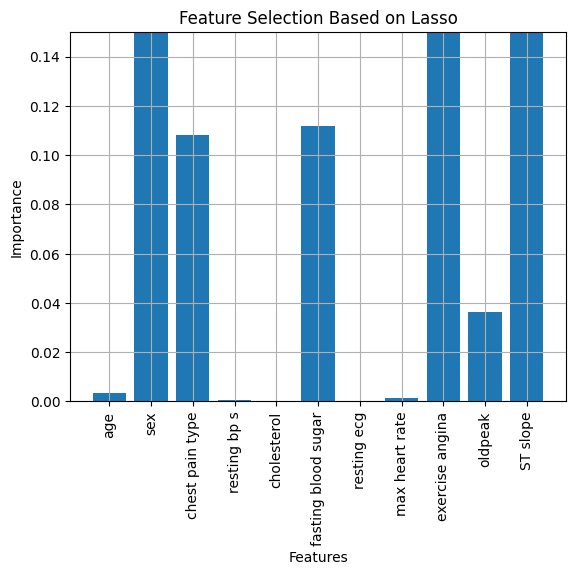

In [ ]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()